# Bike Share EDA 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Import data
train = pd.read_csv('BikeShareTrain.csv')
test = pd.read_csv('BikeShareTest.csv')

In [3]:
# Get an idea of what the data looks like
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,10886
Total Missing (%),0.0%
Total size in memory,1020.6 KiB
Average record size in memory,96.0 B
Numeric,7
Categorical,0
Boolean,2
Date,0
Text (Unique),1
Rejected,2


In [4]:
# Check for any missing values
train.isnull().values.any()

False

##### Let's change the datetime column into mutliple columns - year, month, day, and hour.

In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train = train.drop(['datetime'], axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### Let's look at how some of the features affect the count. 

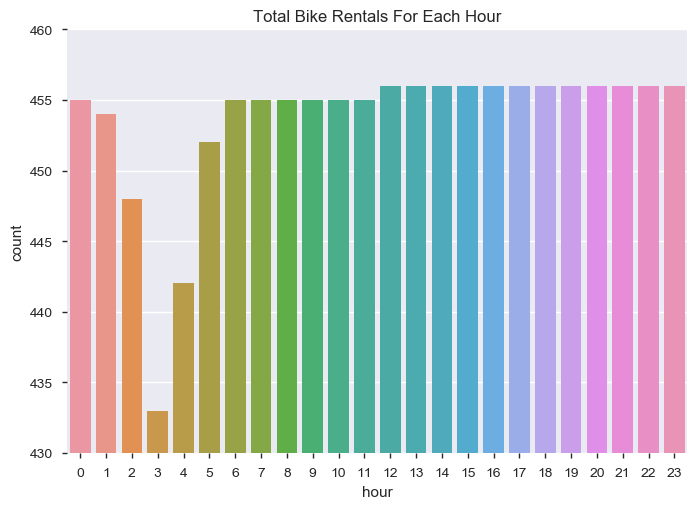

In [6]:
ax1 = sns.countplot(x="hour", data=train)
ax1.set(ylim=(430, 460))
ax1.set_title("Total Bike Rentals For Each Hour")
plt.show()

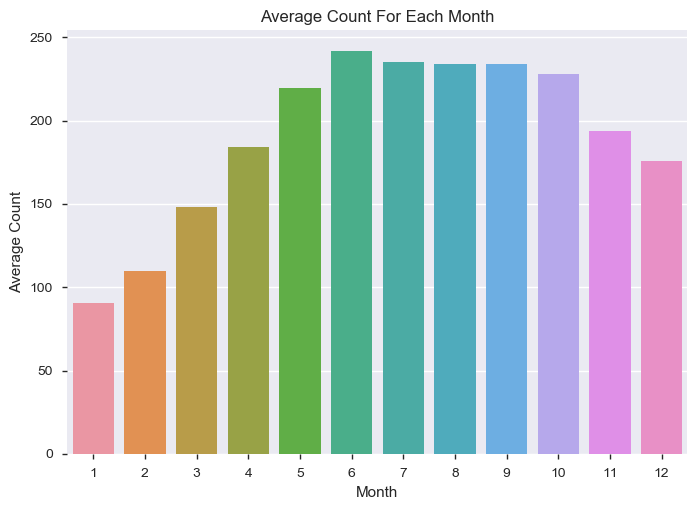

In [7]:
avgUserMonth = train.groupby("month")["count"].mean().reset_index()
ax2 = sns.barplot(data=avgUserMonth, x="month", y="count")
ax2.set(xlabel='Month', ylabel='Average Count', title= "Average Count For Each Month")
plt.show()

We can see from this graph that, unsurprisingly, January has the lowest average count and June has the highest count.  

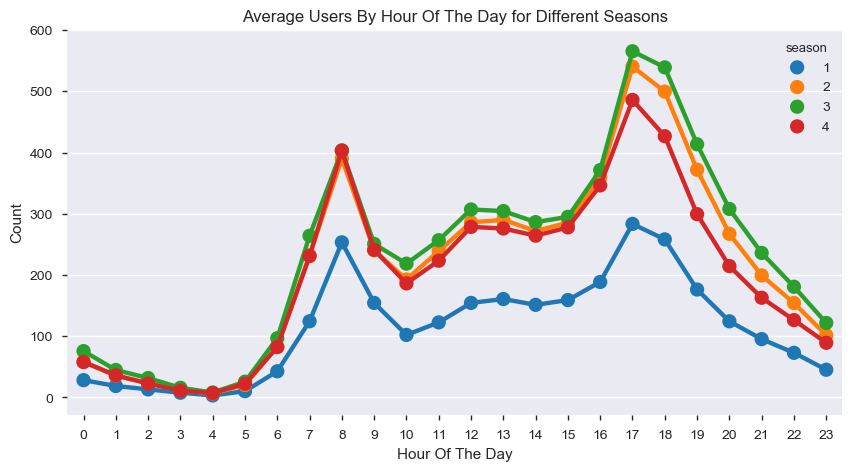

In [8]:
fig= plt.figure(figsize=(10,5))
avgUserSeason = train.groupby(["hour","season"],sort=True)["count"].mean().reset_index()
ax4 = sns.pointplot(x=avgUserSeason["hour"], y=avgUserSeason["count"],hue=avgUserSeason["season"], data=avgUserSeason, join=True)
ax4.set(xlabel='Hour Of The Day', ylabel='Count',title= "Average Users By Hour Of The Day for Different Seasons")
plt.show()

From the graph, it seems that commuters may be the largest subset of users of this bike share program. There is a spike in users around the times 8 a.m. and 5 p.m. 

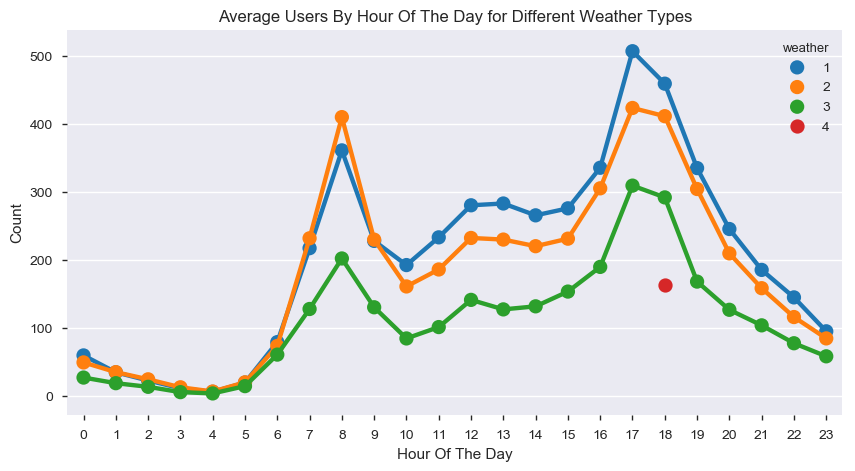

In [9]:
fig= plt.figure(figsize=(10,5))
avgUserWeather = train.groupby(["hour","weather"],sort=True)["count"].mean().reset_index()
ax5 = sns.pointplot(x=avgUserWeather["hour"], y=avgUserWeather["count"],hue=avgUserWeather["weather"], data=avgUserSeason, join=True)
ax5.set(xlabel='Hour Of The Day', ylabel='Count',title= "Average Users By Hour Of The Day for Different Weather Types")
plt.show()

In [10]:
# Change year 2011:0 and 2011:1
def change_year(x):
    if x == 2011:
        return 0
    else:
        return 1
train['year'] = train['year'].apply(change_year)

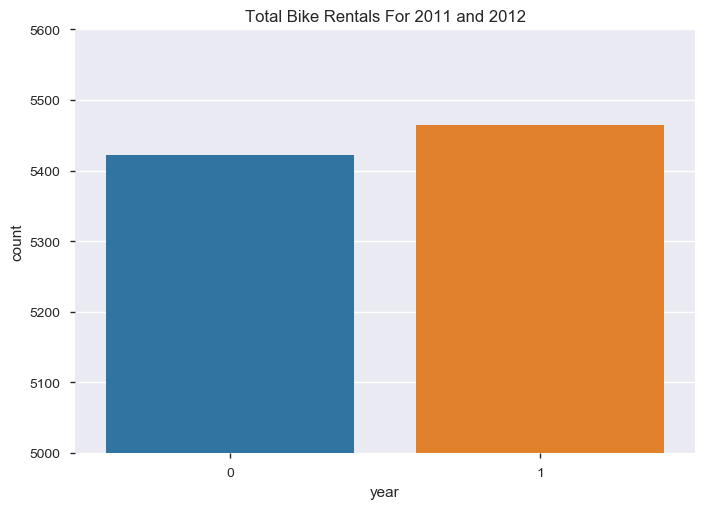

In [11]:
ax6 = sns.countplot(x="year", data=train)
ax6.set(ylim=(5000, 5600))
ax6.set_title("Total Bike Rentals For 2011 and 2012")
plt.show()

In [12]:
# Function to create dummy variables for temperature intervals
def temp_int(t):
    
    if (t>0) & (t<5):
        return 0
    elif (t>=5) & (t<10):
        return 1
    elif (t>=10) & (t<15):
        return 2
    elif (t>=15) & (t<20):
        return 3
    elif (t>=20) & (t<25):
        return 4
    elif (t>=25) & (t<30):
        return 5
    elif (t>=30) & (t<35):
        return 6
    elif (t>=35) & (t<40):
        return 7
    elif (t>=40) & (t<55):
        return 8

train['temp']= train['temp'].apply(temp_int)

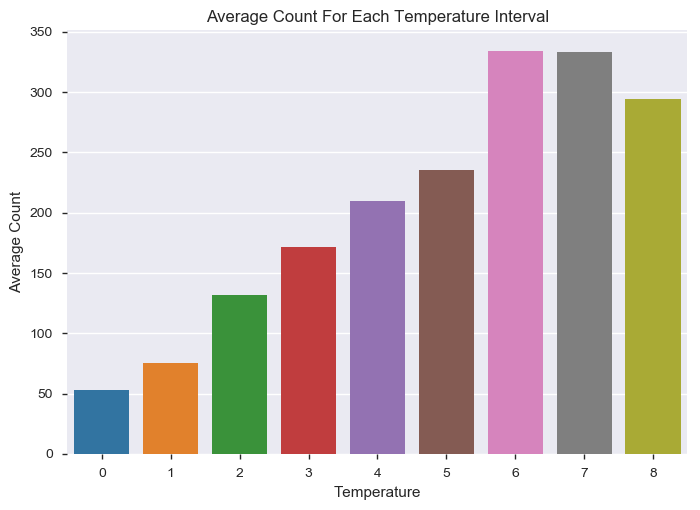

In [13]:
avgUserTemp = train.groupby("temp")["count"].mean().reset_index()
ax7 = sns.barplot(data=avgUserTemp, x="temp", y="count")
ax7.set(xlabel='Temperature', ylabel='Average Count', title= "Average Count For Each Temperature Interval")
plt.show()

Average count is highest in intervals 6,7, and 8 which correspond to temperature intervals [30,35), [35, 40), and [40,45), respectively.

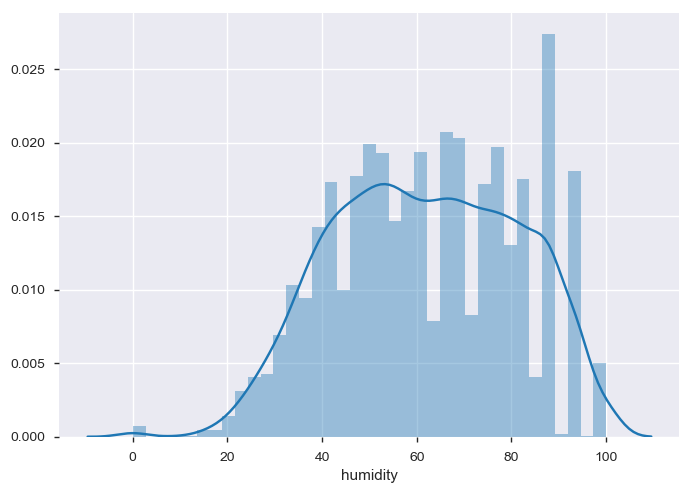

In [15]:
ax8 = sns.distplot(train["humidity"])

In [16]:
# Function to create dummy variables for humidity intervals
def humid_int(t):
    
    if (t<20):
        return 0
    elif (t>=20) & (t<40):
        return 1
    elif (t>=40) & (t<60):
        return 2
    elif (t>=60) & (t<80):
        return 3
    elif (t>=80) & (t<=100):
        return 4    

train['humidity']= train['humidity'].apply(humid_int)

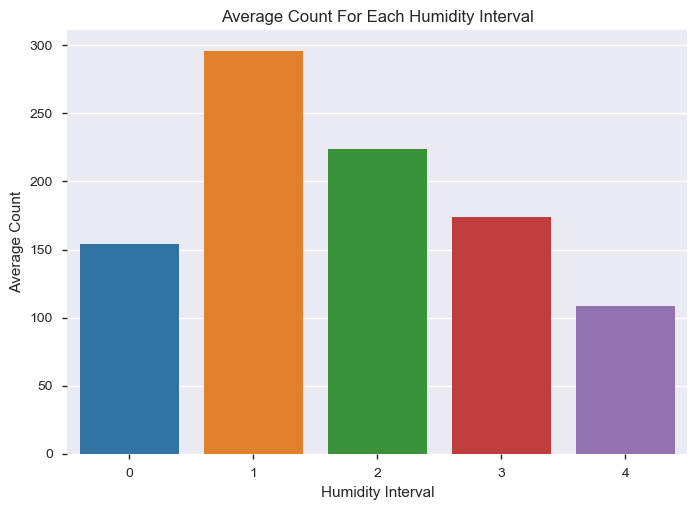

In [17]:
avgUserHumid = train.groupby("humidity")["count"].mean().reset_index()
ax7 = sns.barplot(data=avgUserHumid, x="humidity", y="count")
ax7.set(xlabel='Humidity Interval', ylabel='Average Count', title= "Average Count For Each Humidity Interval")
plt.show()

Average user count is highest when humidity is in the range of 20-40%.

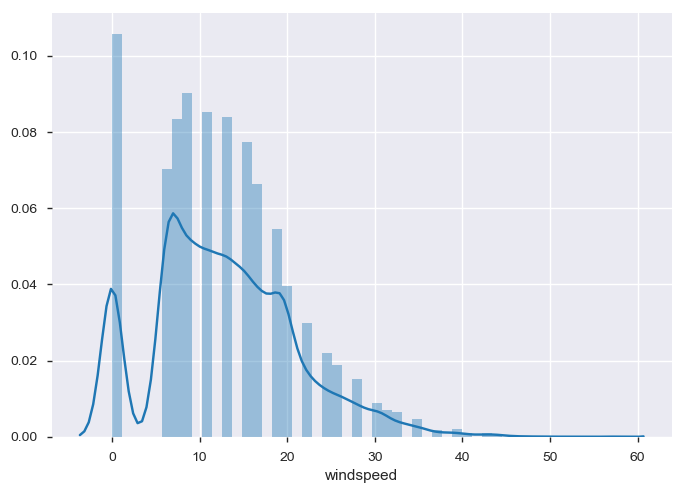

In [18]:
ax9 = sns.distplot(train["windspeed"])